In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics

Data Collection and Processing

In [56]:
# loading the data from csv file to pandas dataframe
laptop_price_dataset = pd.read_csv('Laptop_price.csv')

In [57]:
# inspecting the dataframe
laptop_price_dataset

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


In [58]:
# checking the number of rows and columns
laptop_price_dataset.shape

(1000, 7)

In [59]:
# getting some information about the dataset
laptop_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [60]:
# checking the number of missing values
laptop_price_dataset.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [61]:
# checking the distribution of categorical data
print(laptop_price_dataset['Brand'].value_counts())

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64


Data Analysis

In [62]:
# statistical Measures of the dataset
laptop_price_dataset.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


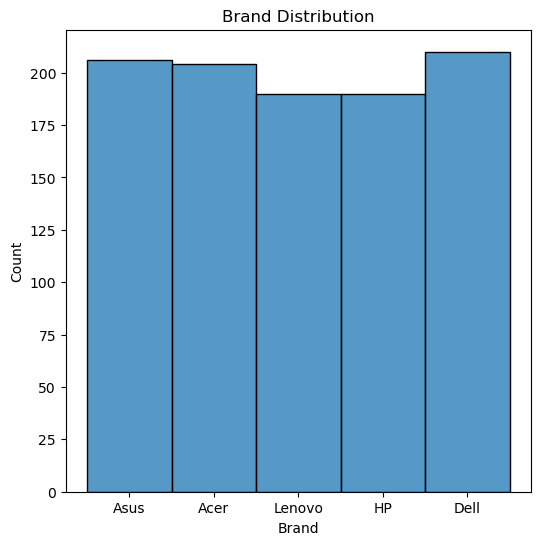

In [63]:
# distribution of Brand value

plt.figure(figsize=(6,6))
sns.histplot(laptop_price_dataset['Brand'])
plt.title('Brand Distribution')
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_9656\3168812887.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop_price_dataset['Price'])


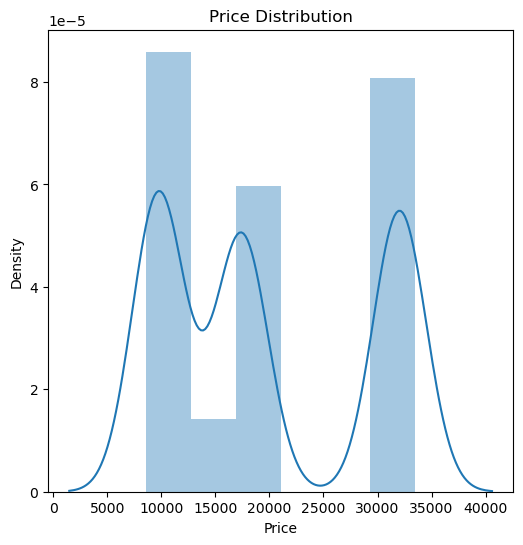

In [64]:
# Price distribution
plt.figure(figsize=(6,6))
sns.distplot(laptop_price_dataset['Price'])
plt.title('Price Distribution')
plt.show()

<Axes: >

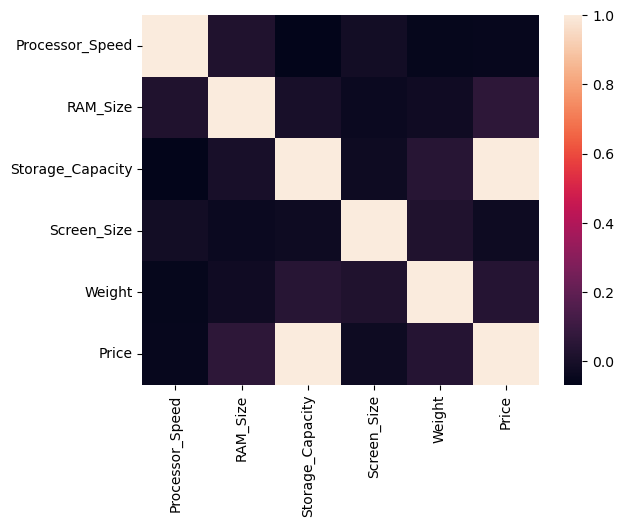

In [65]:
numeric = laptop_price_dataset.iloc[: , [1,2,3,4,5,6]]
sns.heatmap(numeric.corr())

Data Pre-Processing

Encoding the Categorical Data

In [66]:
# encoding "Brand" Column
laptop_price_dataset['Brand'] = laptop_price_dataset['Brand'].map({'Dell':1,'Asus':2,'Acer':3,'Lenovo':4,'HP':5})

In [67]:
print(laptop_price_dataset['Brand'].value_counts())

Brand
1    210
2    206
3    204
4    190
5    190
Name: count, dtype: int64


In [68]:
laptop_price_dataset

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,2,3.830296,16,512,11.185147,2.641094,17395.093065
1,3,2.912833,4,1000,11.311372,3.260012,31607.605919
2,4,3.241627,4,256,11.853023,2.029061,9291.023542
3,3,3.806248,16,512,12.280360,4.573865,17436.728334
4,3,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,5,3.343584,4,1000,12.587095,3.162399,31593.668017
996,1,2.780555,8,256,12.679356,3.750265,9149.521832
997,1,3.200569,4,512,12.666315,3.392612,16552.404779
998,2,1.604182,8,256,11.215581,3.857613,9407.473459


<Axes: >

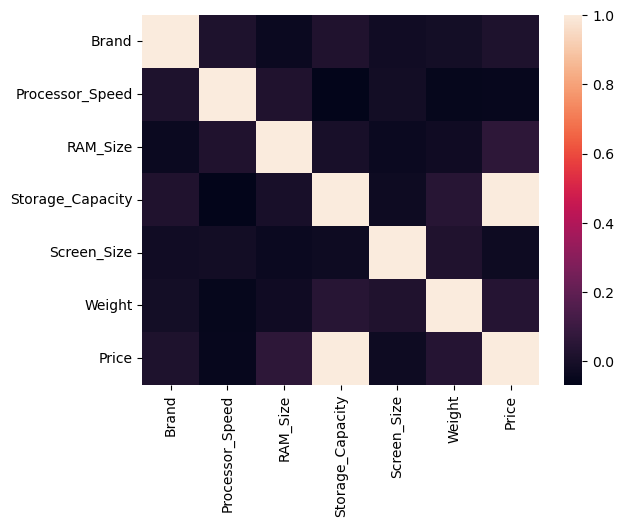

In [69]:
sns.heatmap(laptop_price_dataset.corr())

Splitting the data(features) and Target

In [74]:
X = laptop_price_dataset.drop(['Price'],axis=1)
Y = laptop_price_dataset['Price']

Splitting Training and Test data

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [76]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 6) (800, 6) (200, 6)


In [81]:
from sklearn.metrics import mean_squared_error

def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict = model.predict(X_train)
    ytest_predict = model.predict(X_test)
    
    train_error = np.sqrt(mean_squared_error(Y_train, ytrain_predict))
    test_error = np.sqrt(mean_squared_error(Y_test, ytest_predict))
    
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)

    # Scatter plot for training and testing predictions
    plt.scatter(Y_train, ytrain_predict, marker='o', label='Train Predictions')
    plt.scatter(Y_test, ytest_predict, marker='^', label='Test Predictions')

    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True vs Predicted Values')
    plt.legend()
    plt.show()

    print("Coefficients:")
    print(coefs)
    print('Laptop Predected Price=',coefs[0],'*Brand Number','+',coefs[1],'*Processor Speed','+',coefs[2],'*RAM Size','+',coefs[3],'*Storage Capacity','+',coefs[4],'*Screen Size','+',coefs[5],'*Weight')
    

Model Training

1. Linear Regression

In [82]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [83]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation (Visualize the actual prices and Predicted prices)

Training error (rmse): 199.9911908579244
Testing error (rmse): 179.4766047429019


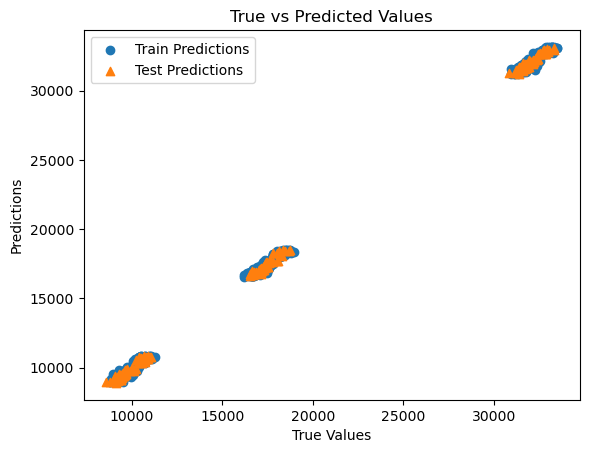

Coefficients:
[486.30690051221245, 2.3754335442816097, 199.5029710808948, 50.50022715680329, 29.98133691740934, 19.718902695351193, -7.33887487315951]
Laptop Predected Price= 486.30690051221245 *Brand Number + 2.3754335442816097 *Processor Speed + 199.5029710808948 *RAM Size + 50.50022715680329 *Storage Capacity + 29.98133691740934 *Screen Size + 19.718902695351193 *Weight


In [84]:
display_results(lin_reg_model)

2. Lasso Regression

In [85]:
# loading the linear regression model
lass_reg_model = Lasso()

In [86]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Training error (rmse): 200.00132024148107
Testing error (rmse): 179.27699000645438


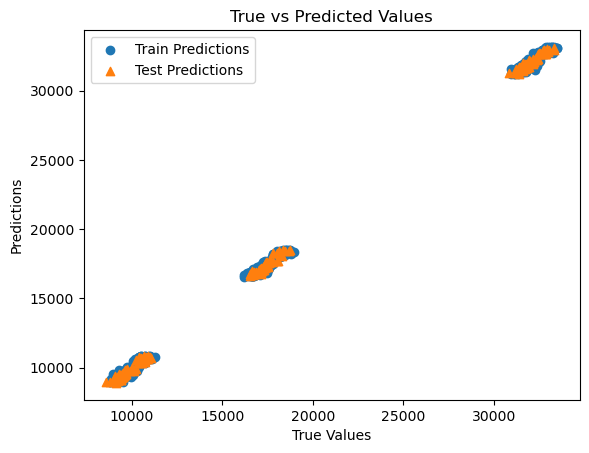

Coefficients:
[494.2726359573571, 1.8765249805773414, 197.65411242583187, 50.495612453891134, 29.980885170193456, 19.3196368144073, -6.039304829683225]
Laptop Predected Price= 494.2726359573571 *Brand Number + 1.8765249805773414 *Processor Speed + 197.65411242583187 *RAM Size + 50.495612453891134 *Storage Capacity + 29.980885170193456 *Screen Size + 19.3196368144073 *Weight


In [87]:
display_results(lass_reg_model)

**2. Ridge Regression**

In [88]:
# loading the linear regression model
rid_reg_model = Ridge()

In [89]:
rid_reg_model.fit(X_train,Y_train)

Ridge()

Training error (rmse): 199.99148780193352
Testing error (rmse): 179.47424929929105


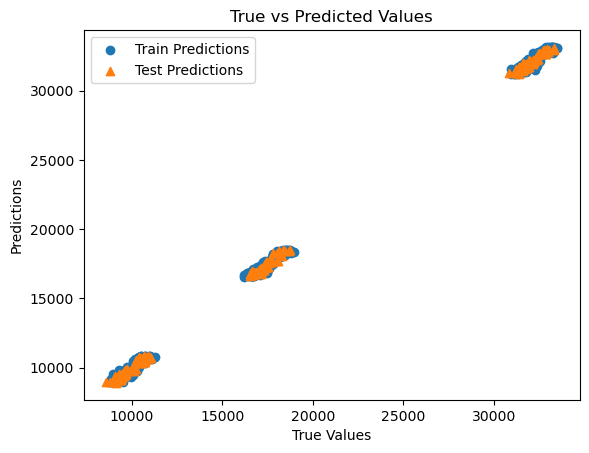

Coefficients:
[487.88145961001646, 2.3801424009202328, 199.02694429867262, 50.500437854289565, 29.981274853707006, 19.702311431311937, -7.343108320357418]
Laptop Predected Price= 487.88145961001646 *Brand Number + 2.3801424009202328 *Processor Speed + 199.02694429867262 *RAM Size + 50.500437854289565 *Storage Capacity + 29.981274853707006 *Screen Size + 19.702311431311937 *Weight


In [90]:
display_results(rid_reg_model)

Building a Predictive System

In [91]:
input_data = (3,3.2,16,1000,12.3,3)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lin_reg_model.predict(input_data_reshaped)
print(prediction)

print('The laptop price is ', prediction[0])

[32141.70913906]
The laptop price is  32141.709139055452


e:\Programs\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
